<a href="https://colab.research.google.com/github/Kendy-Tan/DSCI_522_US_social_determinants_of_health_by_county/blob/main/Tan_DH100_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sufang's Final notebook

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import os
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Creating an csv. file of the text Dataset.
The following code, adapted from "Make_csv_tutorial.ipynb", create one CSV files called 'Digital_Pedagogy_pages.csv'.

In [4]:
#Next we find the directory of the folder in which you store all your txt files in the drive
file_directory = os.listdir('/content/drive/My Drive/Digital Pedagogy pages') #Here we use an example in our drive, you should replace this with your path

In [5]:
Title = []
Content = []
for file in file_directory:
  if file.endswith('.txt'):
    Title.append(file)
    Content.append(open('/content/drive/My Drive/Digital Pedagogy pages/' + file, 'r').read()) ##You still need to replace the path here

In [6]:
your_csv = pd.DataFrame({'Title':Title, 'Content':Content})

In [7]:
your_csv

,Title,Content
0,"Mutiple literacies, new pedagogy [electronic r...",Reproduced with permission of the copyright ow...
1,2018_Book_InvitedLecturesFromThe13thInte.txt,Invited Lectures \nfrom the 13th \nInternation...
2,Computer Support for the Collaborative Learnin...,Computer Support for the Collaborative Learnin...
3,"Decoding Digital Pedagogy, pt. 1_ Beyond the L...",\nHybrid Pedagogy\n\n About\n Podcast\n ...
4,"JENTERY SAYERS, “TINKER-CENTRIC PEDAGOGY IN LI...",CHAPTER 10\nTITLE Tinker-Centric Pedagogy in L...
5,DigitalHumanitiesPedagogy.txt,DIGITAL HUMANITIES \nPEDAGOGY Digital Humani...
6,Analysing_the_use_of_interactive_technol.txt,Analysing the use of interactive technology to...
7,Digital Storytelling in Esl Instruction- Iden...,PREVIEW APPROVAL SHEET\nTitle of Dissertation:...
8,Laying the Foundation.txt,Laying the Foundation\nDigital Humanities in ...
9,A_case_study_of_blog-based_learning_in_K.txt,A case study of blog-based learning in Korea: ...


In [8]:
##Now we need to save our csv to our drive
your_csv.to_csv('Digital_Pedagogy_pages.csv', index=False) ##change the name of your csv if you want
!cp Digital_Pedagogy_pages.csv drive/My\ Drive/ #You can decide which path you want your file in.
##The file name after !cp must be the same as the one you put in the first line. 

In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sklearn
import seaborn as sns
import os
import re
import plotly.express as px
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize

#from pyldavis import sklearn as sklearn_lda
import pickle 


import warnings
warnings.filterwarnings('ignore')

### NLTK cleaning corpus

- tokenization
- adjusting to lowercast words
- remove punctuation
- remove stop words


In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import string, re

In [11]:
# NLTK Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [12]:
import gensim

In [13]:
def remove_punctuation(sentence):
  sentence = re.sub(r'[^\w\s]','', sentence)
  return sentence
cleaned_para = [remove_punctuation(para) for para in Content]

In [14]:
nltk.download('punkt')
tokenized_words = [word_tokenize(para) for para in cleaned_para]
print(tokenized_words[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'Further', 'reproduction', 'prohibited', 'without', 'permission', 'Multiple', 'literacies', 'new', 'pedagogy', 'Emerging', 'notions', 'of', 'oneself', 'and', 'RocheSmith', 'Jeeva', 'Ratna', 'ProQuest', 'Dissertations', 'and', 'Theses', '2004', 'ProQuest', 'Reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'Further', 'reproduction', 'prohibited', 'without', 'permission', 'Reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'Further', 'reproduction', 'prohibited', 'without', 'permission', 'Reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'Further', 'reproduction', 'prohibited', 'without', 'permission', 'Reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'Further', 'reproduction', 'prohibited', 'without', 'permission', 'Reproduced', 'wit

In [15]:
def lower_para(para):
  return [word.lower() for word in para]


lower_words = [lower_para(para) for para in tokenized_words]
print(lower_words[0])

['reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', 'permission', 'multiple', 'literacies', 'new', 'pedagogy', 'emerging', 'notions', 'of', 'oneself', 'and', 'rochesmith', 'jeeva', 'ratna', 'proquest', 'dissertations', 'and', 'theses', '2004', 'proquest', 'reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'with', 'permission', 'of', 'the', 'copyright', 'owner', 'further', 'reproduction', 'prohibited', 'without', '

In [16]:
def remove_stopwords(sentence):
  return [w for w in sentence if not w in stop_words]

nostop_words = [remove_stopwords(para) for para in lower_words]
print(nostop_words[0])


['reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'multiple', 'literacies', 'new', 'pedagogy', 'emerging', 'notions', 'oneself', 'rochesmith', 'jeeva', 'ratna', 'proquest', 'dissertations', 'theses', '2004', 'proquest', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'permission', 'reproduced', 'permission', 'copyright', 'owner', 'reproduction', 'prohibited', 'without', 'pe

## LDA Topic Modeling
The following section of code creates a LDA model with 5s topic using the CSV file created earlier. The following code is adapted from the ["BasicTopicModeling.ipynb"](https://drive.google.com/file/d/15Kr7LqD_znL3CM7dae5DfBwg4geageUz/view?usp=sharing). The LDA model uses the "bag of words" approach so most of its analysis is based on word frequency and prevalance this is the reason that topics created here differ from those produced with the Topic Modeling code. Also, I used pyLDAvis LDA visualization function to further investigate the share topics amongst my corpus.

In [27]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

SOME_FIXED_SEED = 42
number_topics = 5
number_words = 10
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(Content)

In [29]:
np.random.seed(SOME_FIXED_SEED)

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)


LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [30]:
print("Topics found via LDA:")

def count_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
count_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning education students digital teachers research teaching new technology university

Topic #1:
learning students mathematics education teachers teaching use children work teacher

Topic #2:
education permission people online oppressed world owner copyright pedagogy technology

Topic #3:
digital humanities students research new computing project http text work

Topic #4:
learning education technology distance teaching research open theory educational online


In [31]:
!pip install pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

     |████████████████████████████████| 1.7 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 33.3 MB/s 
     |████████████████████████████████| 11.3 MB 43.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b92b9e7b1ee956f0153fadccf55a128f3bb89a011ab4a0e0cb6bdf5e3e2297fd
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [32]:
import pyLDAvis 

In [35]:
!pip install pandas --upgrade

In [36]:
LDAvis_data_filepath = 'ldavis_prepared_'+str(number_topics)
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer,sort_topics=False)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(number_topics) +'.html')
pyLDAvis.display(LDAvis_prepared)

TypeError: ignored

### Vader Sentiment analysis 


In [37]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 

     |████████████████████████████████| 125 kB 10.1 MB/s 


In [38]:
tokenized_sent = [' '.join(para) for para in tokenized_words]

In [39]:
print("\n1st statement :") 
sentence = tokenized_sent[0] 

# function calling 
sentiment_scores(sentence) 


1st statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral


In [40]:
tokenized_sent[0]

'Reproduced with permission of the copyright owner Further reproduction prohibited without permission Multiple literacies new pedagogy Emerging notions of oneself and RocheSmith Jeeva Ratna ProQuest Dissertations and Theses 2004 ProQuest Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Further reproduction prohibited without permission Reproduced with permission of the copyright owner Furth

In [41]:
count = 0
for para in tokenized_words:
  count += len(para)

print(count)

1862738


In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [43]:
results = []
for sent in tokenized_sent:
  results.append(sid.polarity_scores(sent))

print(results)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.031, 'neu': 0.866, 'pos': 0.103, 'compound': 1.0}, {'neg': 0.043, 'neu': 0.886, 'pos': 0.071, 'compound': 0.9998}, {'neg': 0.033, 'neu': 0.872, 'pos': 0.095, 'compound': 0.9986}, {'neg': 0.032, 'neu': 0.901, 'pos': 0.067, 'compound': 0.9998}, {'neg': 0.027, 'neu': 0.881, 'pos': 0.092, 'compound': 1.0}, {'neg': 0.018, 'neu': 0.909, 'pos': 0.073, 'compound': 0.9999}, {'neg': 0.019, 'neu': 0.892, 'pos': 0.089, 'compound': 0.9998}, {'neg': 0.027, 'neu': 0.875, 'pos': 0.098, 'compound': 1.0}, {'neg': 0.007, 'neu': 0.92, 'pos': 0.073, 'compound': 0.9999}, {'neg': 0.035, 'neu': 0.857, 'pos': 0.108, 'compound': 1.0}, {'neg': 0.027, 'neu': 0.879, 'pos': 0.094, 'compound': 1.0}, {'neg': 0.027, 'neu': 0.848, 'pos': 0.125, 'compound': 1.0}, {'neg': 0.046, 'neu': 0.832, 'pos': 0.122, 'compound': 0.9993}, {'neg': 0.041, 'neu': 0.845, 'pos': 0.115, 'compound': 1.0}, {'neg': 0.027, 'neu': 0.869, 'pos': 0.104, 'compound': 1.0}, {'neg': 0

In [44]:
def get_sentiment(d):
  max_v = 0.0
  for k,v in d.items():
    if k != 'compound':
      if v > max_v:
        max_v = v
        max_k = k

  return max_k

atitudes = [get_sentiment(result) for result in results]
print(atitudes)

['neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu']


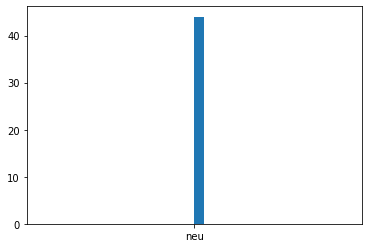

In [45]:
import matplotlib
import matplotlib.pyplot as plt

atitudes= ['neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu']

plt.hist(atitudes,bins = 30);